In [10]:
!pip install numpy pandas matplotlib scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------------------- ------------------- 5.8/11.1 MB 32.0 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 38.7 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [12]:
!pip install openpyxl


Model Performance:
MAE: 1600.98
RMSE: 1873.50


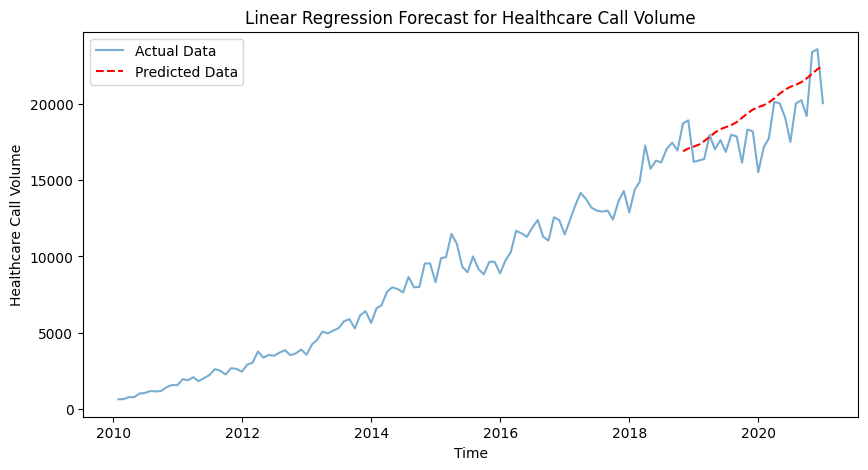

In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 2: Load Dataset
file_path = "CallCenterData.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Step 3: Convert 'month' column to datetime format and set it as index
df['month'] = pd.to_datetime(df['month'])
df.set_index('month', inplace=True)

# Step 4: Create Time-Based Features
df['time_index'] = np.arange(len(df))  # Numeric time index
df['time_squared'] = df['time_index'] ** 2  # Polynomial feature
df['sin_time'] = np.sin(df['time_index'])  # Seasonality feature

# Step 5: Define Features (X) and Target Variable (y)
X = df[['time_index', 'time_squared', 'sin_time']]
y = df['Healthcare']  # Forecasting call volume in Healthcare sector

# Step 6: Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 7: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}")

# Step 10: Plot Actual vs. Predicted Values
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Healthcare'], label="Actual Data", alpha=0.6)
plt.plot(X_test.index, y_pred, label="Predicted Data", color='red', linestyle="dashed")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Healthcare Call Volume")
plt.title("Linear Regression Forecast for Healthcare Call Volume")
plt.show()
